In [1]:
from Triangle import Triangle

In [2]:
def gen_id(x, y, z):
    """Генератор id для треугольника"""
    return int(str(x) + str(y) + str(z))

In [3]:
class FirstContainer:
    '''FirstContainer is wrapper over built-in list (but sorted)'''
    def __init__(self, *new_data):
        new_data = [(gen_id(el.side1, el.side2, el.side3), el) for el in new_data]
        self.data = new_data
        self.data.sort()
        self.index = 0

    def __repr__(self):
        return f'{self.data}'
        
    def __str__(self):
        return f'Class FirstContainer with data={self.data}'

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index][1]

    def __setitem__(self, index, value):
        pass

    def __iter__(self):
        return self

    def __next__(self):
        if self.index == len(self):
            raise StopIteration
        data_to_ret = self.data[self.index][1]
        self.index = self.index + 1
        return data_to_ret

    # from here starts 4 useful methods
    def __delitem__(self, index):
        lst = []
        for i in range(0, len(self)):
            if i != index:
                lst.append(self.data[i])
        self.data = lst

    def __contains__(self, item):
        return True if self.find(item) != len(self) else False
    
    def insert(self, item):
        item = (gen_id(item.side1, item.side2, item.side3), item)
        lst = []
        ins = False
        for i in range(0, len(self)):
            if self.data[i][0] < item[0] or ins:
                lst.append(self.data[i])
            else:
                lst.append(item)
                lst.append(self.data[i])
                ins = True
        if not ins:
            lst.append(item)
        self.data = lst

    def find(self, item):
        item = (gen_id(item.side1, item.side2, item.side3), item)
        low, high = 0, len(self) - 1
        while(low <= high):
            mid = (low + high) // 2
            if self.data[mid][0] == item[0]:
                return mid
            elif self.data[mid][0] > item[0]:
                high = mid - 1
            elif self.data[mid][0] < item[0]:
                low = mid + 1
        return len(self)

Class tests below:
    - deletion (by index): passed
    - insertion (list of Point instances): passed
    - find (return index of element or len(container) if no element): passed
    - contains (find on steroids): passed
    - len (return number of elements in container): passed
    - str: passed
    - repr (some tech-info): passed
    - getitem (by index): passed
    - iter with next: passed

In [4]:
# Init
c = FirstContainer(Triangle(10, 8, 12), Triangle(12, 12, 12), Triangle(30, 45, 45))

In [5]:
# str() and representation
print(str(c))
c

Class FirstContainer with data=[(10812, Triangle(side1=10 side2=8 side3=12)), (121212, Triangle(side1=12 side2=12 side3=12)), (304545, Triangle(side1=30 side2=45 side3=45))]


[(10812, Triangle(side1=10 side2=8 side3=12)), (121212, Triangle(side1=12 side2=12 side3=12)), (304545, Triangle(side1=30 side2=45 side3=45))]

In [6]:
# len
len(c)

3

In [7]:
# getitem
c[1], type(c[1])

(Triangle(side1=12 side2=12 side3=12), Triangle.Triangle)

In [8]:
# iterator with next()
c_it = iter(c)
if c_it is not None:
    print(next(c_it))
    print(next(c_it))
    print(next(c_it))

Triangle(10, 8, 12)
Triangle(12, 12, 12)
Triangle(30, 45, 45)


In [9]:
# insertion
c.insert(Triangle(10, 8, 8))
c

[(1088, Triangle(side1=10 side2=8 side3=8)), (10812, Triangle(side1=10 side2=8 side3=12)), (121212, Triangle(side1=12 side2=12 side3=12)), (304545, Triangle(side1=30 side2=45 side3=45))]

In [10]:
# deletion
del c[len(c) - 1]
c

[(1088, Triangle(side1=10 side2=8 side3=8)), (10812, Triangle(side1=10 side2=8 side3=12)), (121212, Triangle(side1=12 side2=12 side3=12))]

In [11]:
# find and contains
print(f'''
find Triangle in class: {c.find(Triangle(10, 8, 8))}
find Triangle not in class: {c.find(Triangle(10, 6, 8))}
len of class: {len(c)}
___________________________
contains (Triangle in class): {Triangle(10, 8, 8) in c}
contains (Triangle not in class): {Triangle(10, 6, 8) in c}
'''.strip())

find Triangle in class: 0
find Triangle not in class: 3
len of class: 3
___________________________
contains (Triangle in class): True
contains (Triangle not in class): False


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import math
import random

In [24]:
plt.rcParams['figure.figsize'] = [10, 6]

def perform_bench(type_of_bench):
    if type_of_bench == 'insert':
        ns = np.linspace(1, 10_000, 10, dtype=int)
        for n in ns:
            ts = [timeit.timeit('c.insert(Triangle({}, {}, {}))'.format(n, n, n), 
                            setup='c = FirstContainer(*[Triangle(i, i, i) for i in range(1, {})])'.format(n),
                            globals=globals(),
                            number=1000)
          for n in ns]
    elif type_of_bench == 'delete':
        ns = np.linspace(1, 100_000, 10, dtype=int)
        ts = [timeit.timeit('del c[{}]'.format(n - 1), 
                            setup='c = FirstContainer(*[Triangle(i, i, i) for i in range(1, {})])'.format(n),
                            globals=globals(),
                            number=1000)
          for n in ns]
    elif type_of_bench == 'find':
        ns = np.linspace(1, 100_000, 10, dtype=int)
        ts = [timeit.timeit('c.find(Triangle({}, {}, {}))'.format(n, n, n), 
                            setup='c = FirstContainer(*[Triangle(i, i, i) for i in range(1, {})])'.format(n),
                            globals=globals(),
                            number=1000)
          for n in ns]
    elif type_of_bench == 'contains':
        ns = np.linspace(1, 100_000, 10, dtype=int)
        ts = [timeit.timeit('Triangle({}, {}, {}) in c'.format(n, n, n), 
                            setup='c = FirstContainer(*[Triangle(i,i,i) for i in range(1, {})])'.format(n),
                            globals=globals(),
                            number=1000)
          for n in ns]
    plt.plot(ns, ts, 'or')
    
    degree = 4
    coeffs = np.polyfit(ns, ts, degree)
    p = np.poly1d(coeffs)
    plt.plot(ns, [p(n) for n in ns], '-b')

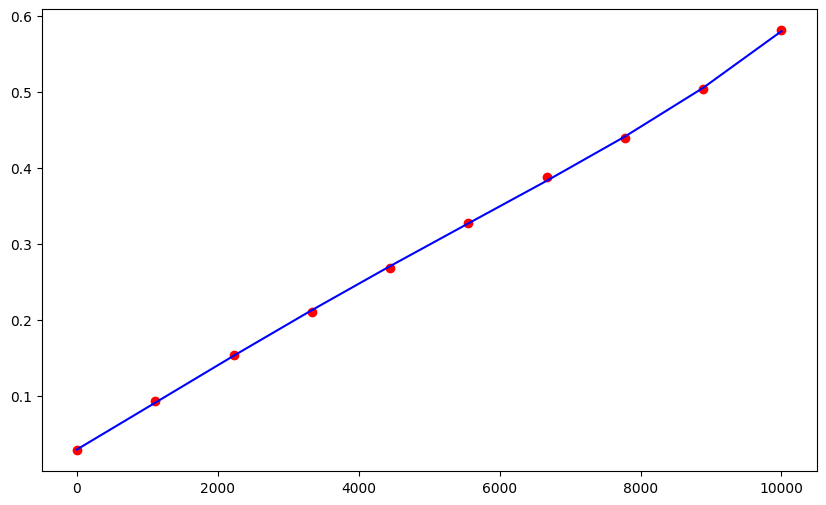

In [18]:
perform_bench('insert')

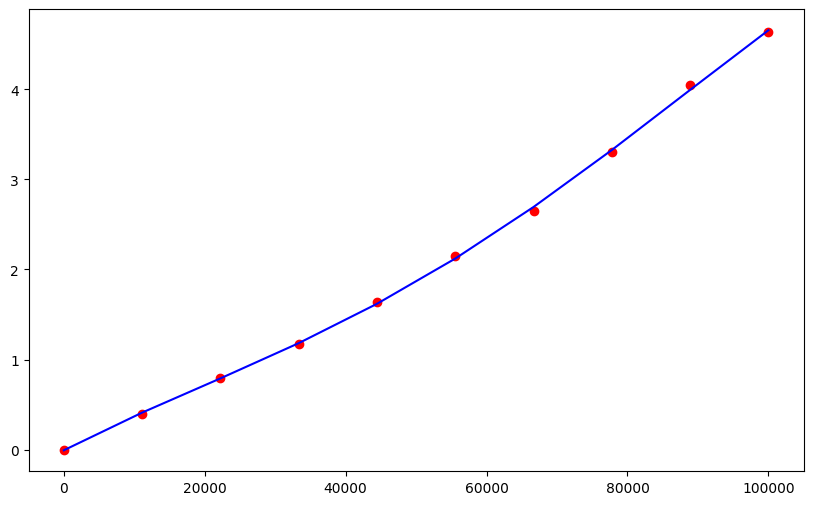

In [19]:
perform_bench('delete')

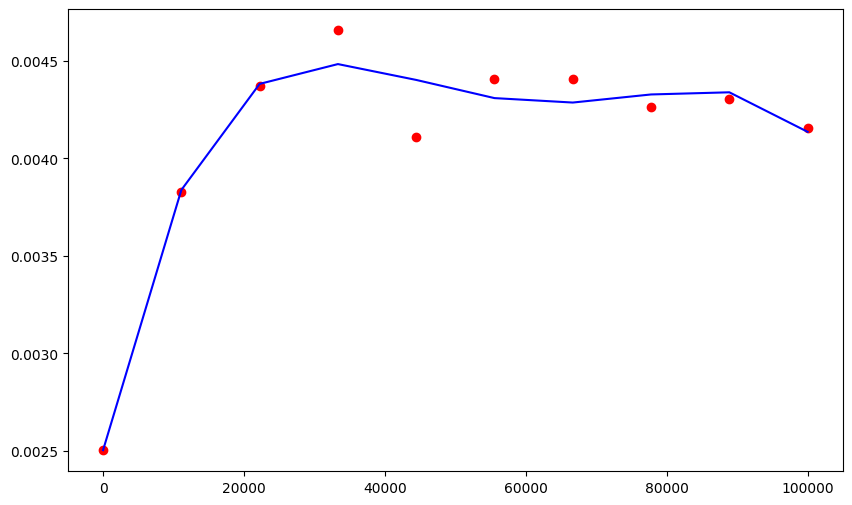

In [22]:
perform_bench('find')

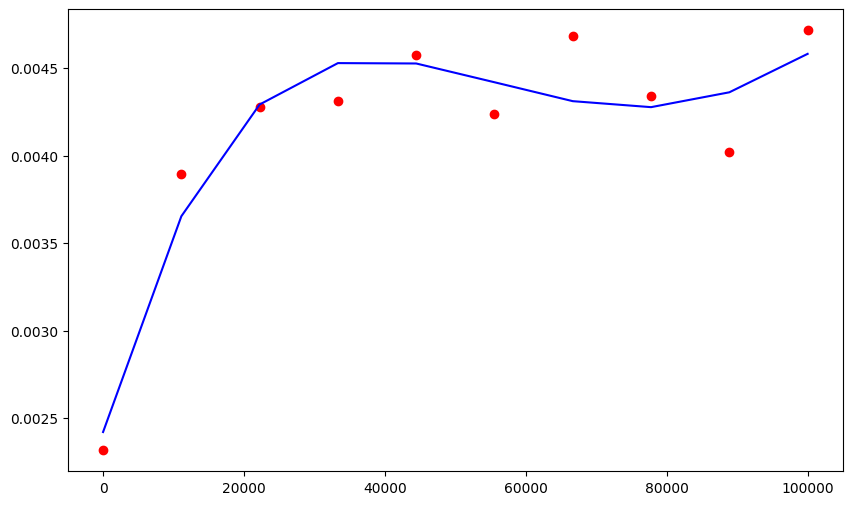

In [28]:
perform_bench('contains')